In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torchvision
import torch
from torchvision import transforms
from sklearn.metrics import classification_report  # Add this line

In [ ]:
!pip install plotly

**Preprocessing :**

- **normalized** the data using **`transforms.Normalize` by 0.5**
- **scaled** using**`transforms.ToTensor()`** scales the pixel values from the range [0, 255] to [0, 1].
- **Agumention** using **Random Affine Transformation,Random Horizontal Flip,Random Affine Transformation**

In [17]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    transforms.RandomAffine(degrees=0, scale=(0.95, 1.05)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

100%|██████████| 170498071/170498071 [00:02<00:00, 84335198.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


**Loading and splitting the data by 0.2 validation split with Applying The preprocessing steps**

In [18]:
validation_split = 0.2
dataset_size = len(dataset)
split = int(validation_split * dataset_size)
train_size = dataset_size - split

In [19]:
train_data, valid_data = torch.utils.data.random_split(dataset, [train_size, split])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=False, pin_memory=True)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True, pin_memory=True)

Files already downloaded and verified


In [23]:
print(dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomAffine(degrees=[0.0, 0.0], translate=(0.05, 0.05))
               RandomAffine(degrees=[0.0, 0.0], scale=(0.95, 1.05))
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [24]:
print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [20]:

print(valid_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [29]:
classes=dataset.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


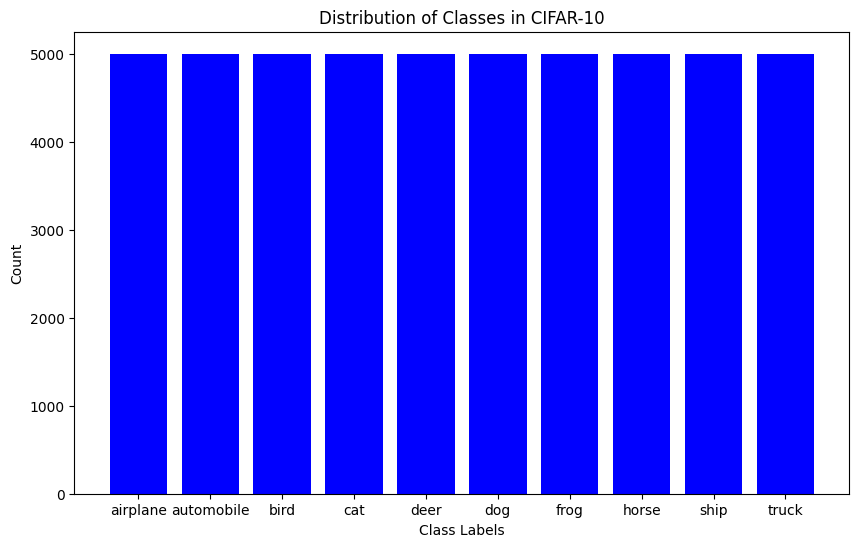

In [34]:
class_counts = {label: 0 for label in classes}
for _, label in dataset:
    class_counts[classes[label]] += 1
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='blue')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Classes in CIFAR-10')
plt.show()

images.shape: torch.Size([128, 3, 32, 32])
labels.shape: torch.Size([128])


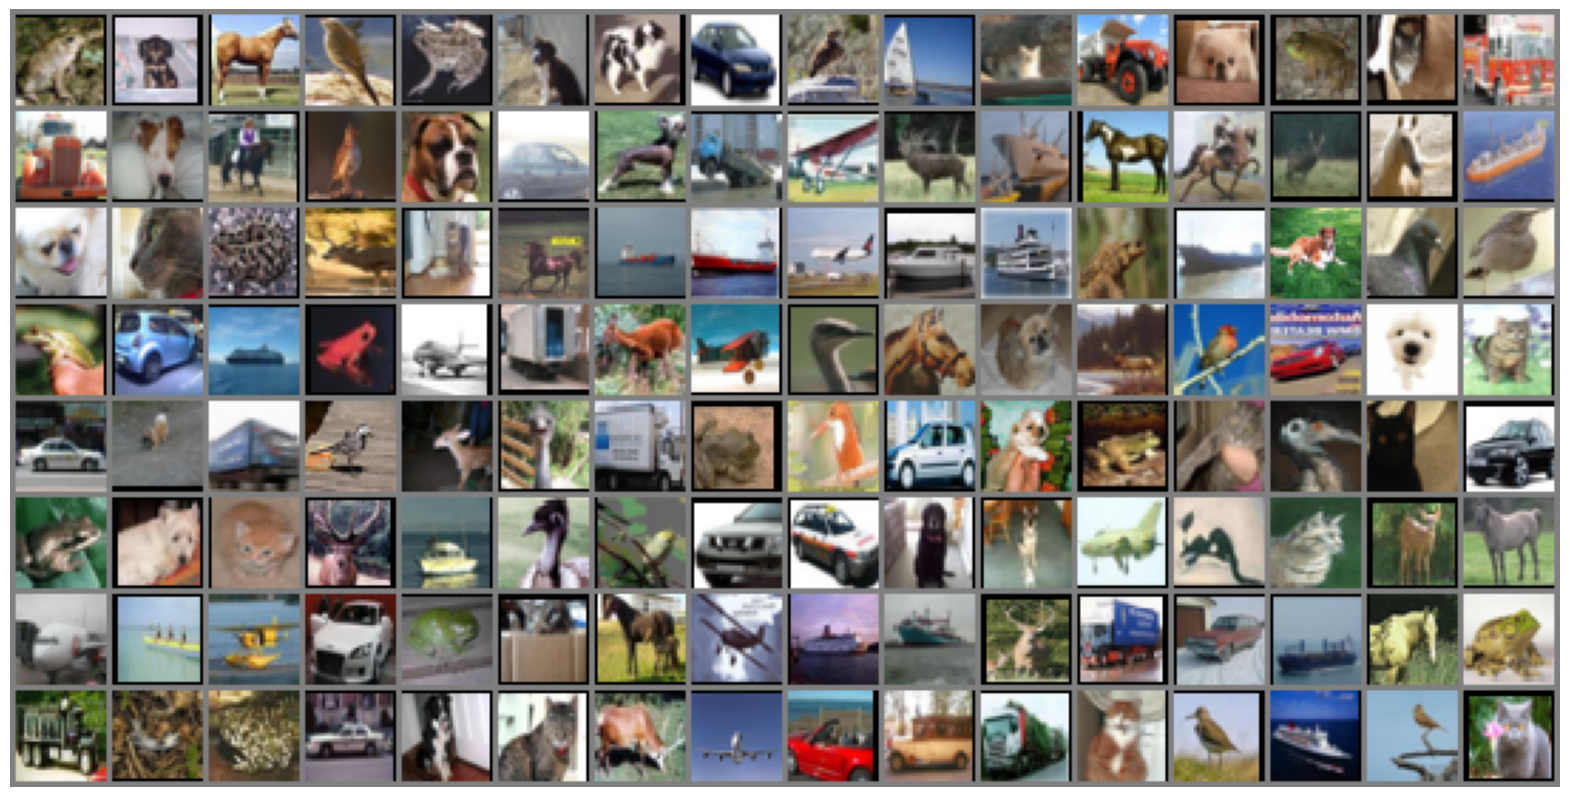

In [ ]:
images, labels = next(iter(train_loader))
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)

img=torchvision.utils.make_grid(images,16)
img = img / 2 + 0.5
img_arr = img.numpy()
plt.figure(figsize=(20,24))
plt.axis('off')
plt.imshow(np.transpose(img_arr, (1, 2, 0)))
plt.show()



images.shape: torch.Size([128, 3, 32, 32])
labels.shape: torch.Size([128])


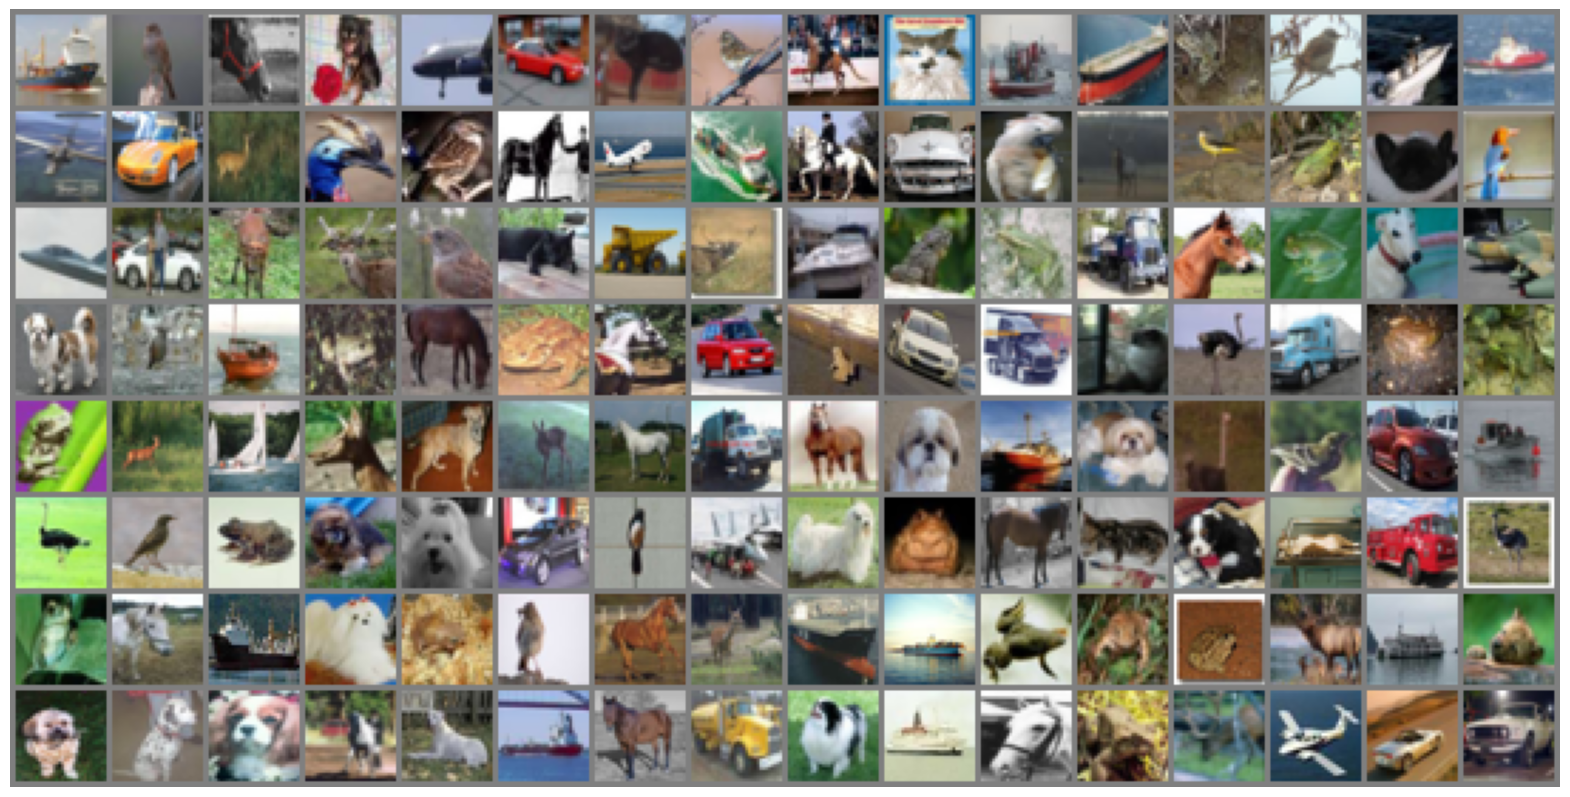

In [ ]:
images, labels = next(iter(test_loader))
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)

img=torchvision.utils.make_grid(images,16)
img = img / 2 + 0.5
img_arr = img.numpy()
plt.figure(figsize=(20,24))
plt.axis('off')
plt.imshow(np.transpose(img_arr, (1, 2, 0)))
plt.show()


color distribution across all images in a dataset

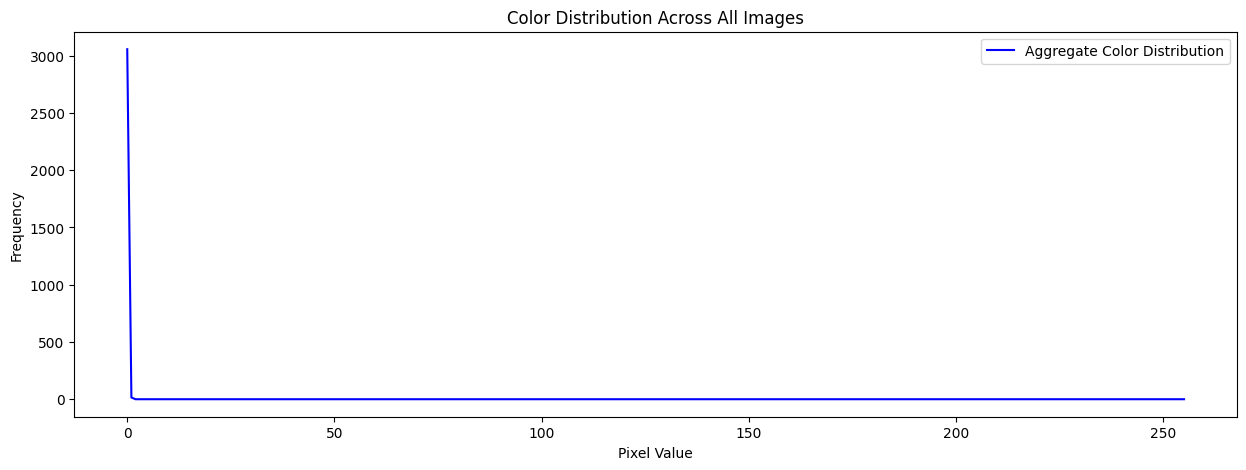

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

color_distributions = []
for img in images:
    img_non_negative = np.clip(img, 0, None)
    color_distribution = np.bincount(img_non_negative.flatten(), minlength=256)
    color_distributions.append(color_distribution)

color_distributions = np.array(color_distributions)
mean_color_distribution = np.mean(color_distributions, axis=0)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(256), mean_color_distribution, color='blue', label='Aggregate Color Distribution')
plt.title('Color Distribution Across All Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Pixel Value Distribution before and after normalization :

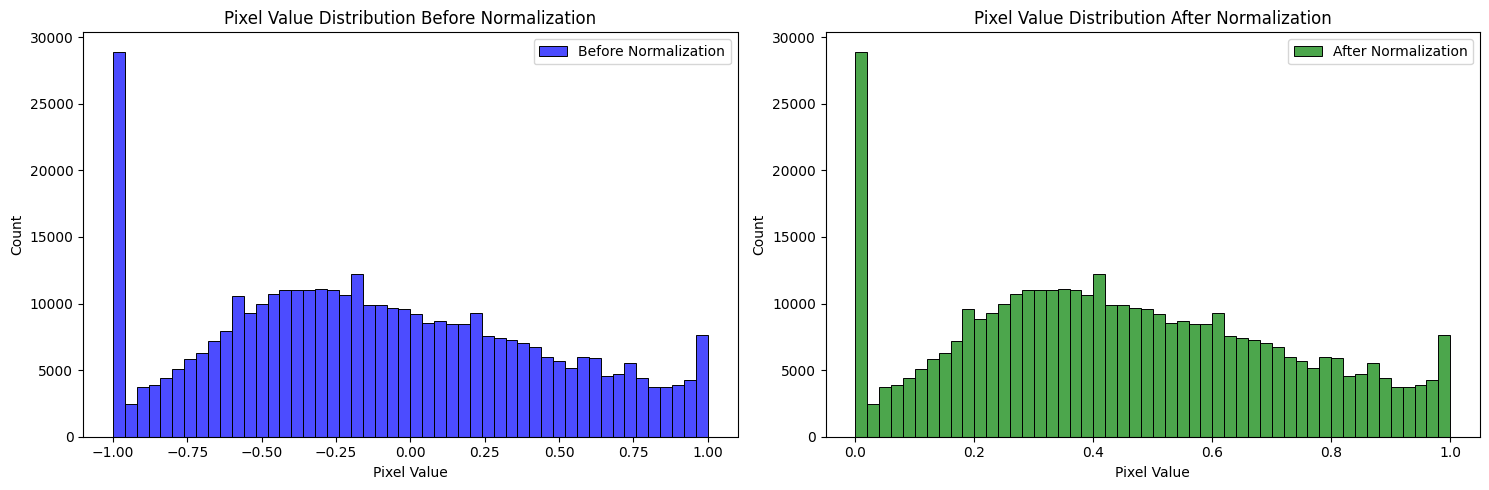

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

images, labels = next(iter(train_loader))

original_pixel_values = images.numpy().flatten()

normalized_images = images / 2 + 0.5

normalized_pixel_values = normalized_images.numpy().flatten()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Pixel Value Distribution before normalization
sns.histplot(original_pixel_values, bins=50, color='blue', alpha=0.7, label='Before Normalization', ax=axes[0])
axes[0].set_title('Pixel Value Distribution Before Normalization')
axes[0].set_xlabel('Pixel Value')
axes[0].legend()

# Plot Pixel Value Distribution after normalization
sns.histplot(normalized_pixel_values, bins=50, color='green', alpha=0.7, label='After Normalization', ax=axes[1])
axes[1].set_title('Pixel Value Distribution After Normalization')
axes[1].set_xlabel('Pixel Value')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


**Training and Evaluating Function**

In [ ]:
def train_and_evaluate(model, train_loader, valid_loader, test_loader, criterion, optimizer, epochs=20, train_on_gpu=False):
    train_losses = []
    test_losses = []
    valid_accuracies = []
    all_labels = []
    all_predictions = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            if train_on_gpu:
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

            accuracy = correct / total
            valid_accuracies.append(accuracy)

            print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}, Validation Accuracy: {accuracy}')

        model.eval()
        test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    return train_losses, test_losses, valid_accuracies,all_predictions,all_labels


**First Model**

In [ ]:
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

improved_model = ImprovedNet()
if train_on_gpu:
    improved_model.cuda()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)

In [ ]:
train_losses, test_losses, valid_accuracies,all_labels, all_predictions= train_and_evaluate(improved_model, train_loader, valid_loader, test_loader, criterion, optimizer, epochs=20, train_on_gpu=True)

Epoch 1/20, Training Loss: 1.70258164672425, Validation Accuracy: 0.4949
Epoch 1/20, Training Loss: 1.70258164672425, Test Loss: 1.298867408233353
Epoch 2/20, Training Loss: 1.2967726030288793, Validation Accuracy: 0.5978
Epoch 2/20, Training Loss: 1.2967726030288793, Test Loss: 1.0991998933538605
Epoch 3/20, Training Loss: 1.1002588313989365, Validation Accuracy: 0.6321
Epoch 3/20, Training Loss: 1.1002588313989365, Test Loss: 0.9956166027467462
Epoch 4/20, Training Loss: 0.9770331278014869, Validation Accuracy: 0.7002
Epoch 4/20, Training Loss: 0.9770331278014869, Test Loss: 0.8435486705997323
Epoch 5/20, Training Loss: 0.8923865486257754, Validation Accuracy: 0.7194
Epoch 5/20, Training Loss: 0.8923865486257754, Test Loss: 0.7737973969948443
Epoch 6/20, Training Loss: 0.8280444872645906, Validation Accuracy: 0.7307
Epoch 6/20, Training Loss: 0.8280444872645906, Test Loss: 0.7578912792326529
Epoch 7/20, Training Loss: 0.7719996184967577, Validation Accuracy: 0.7466
Epoch 7/20, Traini

**Evaluation Process**

Confusion Matrix

Classification Report

Evaluation Graphs

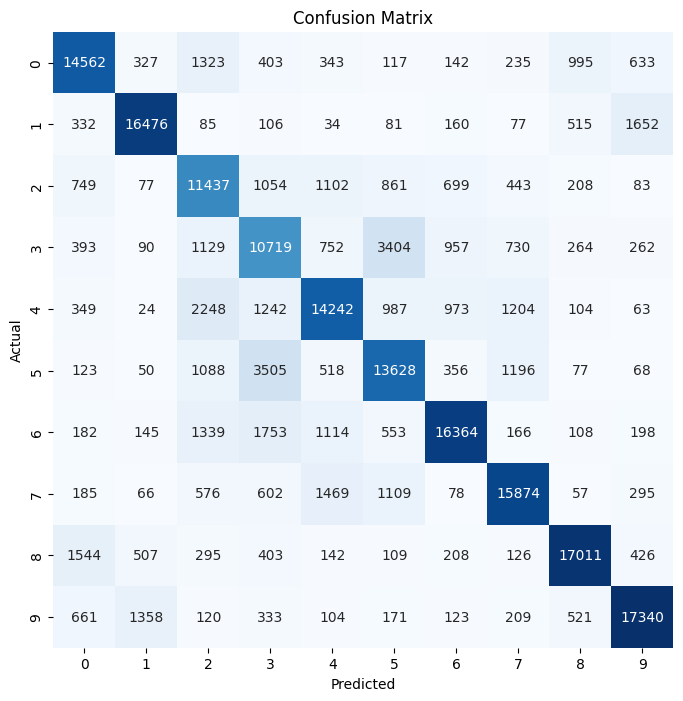

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     19080
           1       0.86      0.84      0.85     19518
           2       0.58      0.68      0.63     16713
           3       0.53      0.57      0.55     18700
           4       0.72      0.66      0.69     21436
           5       0.65      0.66      0.65     20609
           6       0.82      0.75      0.78     21922
           7       0.78      0.78      0.78     20311
           8       0.86      0.82      0.84     20771
           9       0.82      0.83      0.83     20940

    accuracy                           0.74    200000
   macro avg       0.74      0.74      0.74    200000
weighted avg       0.74      0.74      0.74    200000



In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(all_labels, all_predictions))


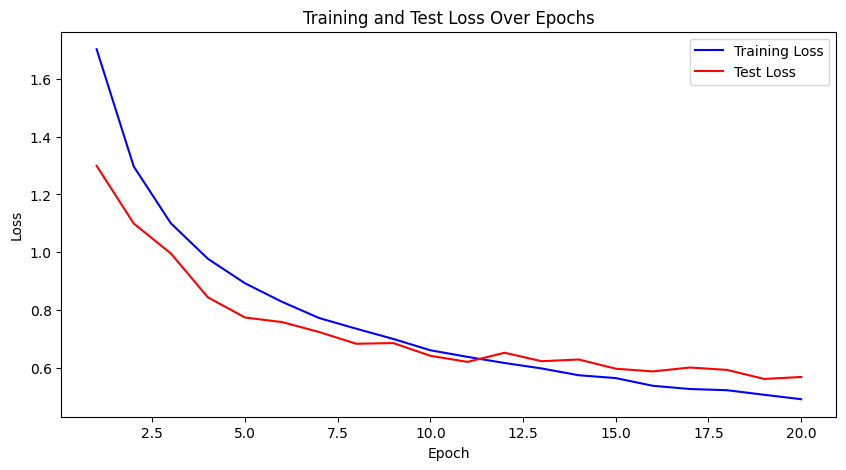

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20 + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, 20 + 1), test_losses, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()

plt.show()

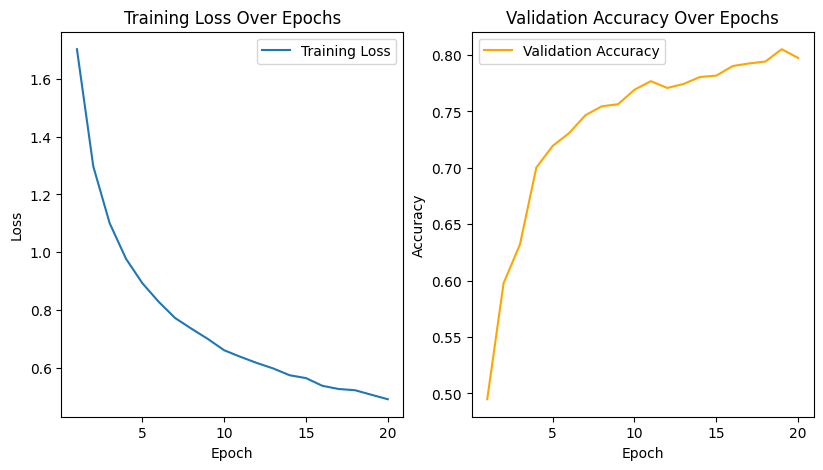

In [ ]:
plt.figure(figsize=(15, 5))

# Plot Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, 20 + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 20 + 1), valid_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

**I added learning rate scheduler For convergence speed**

In [ ]:
def train_and_evaluate(model, train_loader, valid_loader, test_loader, criterion, optimizer, lr_scheduler, epochs=20, train_on_gpu=False):
    train_losses = []
    test_losses = []
    valid_accuracies = []
    all_labels = []
    all_predictions = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            if train_on_gpu:
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

            accuracy = correct / total
            valid_accuracies.append(accuracy)

            print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}, Validation Accuracy: {accuracy}')

        lr_scheduler.step()

        model.eval()
        test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    return train_losses, test_losses, valid_accuracies, all_predictions, all_labels


**The changes I made to get the 2nd Model**

I added new Conv layer and Batch Normalization

I added weight_decay=1e-4 as a form of L2 regularization applied to the optimizer to help prevent overfitting.

I added lr_scheduler to speed convergence

**I changed the number of epochs to be 50 instead of 20 ( I actually tried 30 and I applied some of the changes above but i got (80,82,83) as Accuracy so I kept the best of them which was the below model**  

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedNet(nn.Module):
    def __init__(self, input_channels=3, input_size=32):
        super(ImprovedNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        fc_input_size = 512 * (input_size // 16) * (input_size // 16)

        self.fc1 = nn.Linear(fc_input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

improved_model = ImprovedNet(input_channels=3, input_size=32)
if train_on_gpu:
    improved_model.cuda()

print(improved_model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(improved_model.parameters(), lr=0.001, weight_decay=1e-4)

lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

ImprovedNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)


In [ ]:
train_losses, test_losses, valid_accuracies, all_predictions, all_labels = train_and_evaluate(improved_model, train_loader, valid_loader, test_loader, criterion, optimizer, lr_scheduler, epochs=50, train_on_gpu=True)


Epoch 1/50, Training Loss: 1.5628430641497286, Validation Accuracy: 0.5398
Epoch 1/50, Training Loss: 1.5628430641497286, Test Loss: 1.2146757463865643
Epoch 2/50, Training Loss: 1.1558730802216088, Validation Accuracy: 0.62
Epoch 2/50, Training Loss: 1.1558730802216088, Test Loss: 1.0543471069275578
Epoch 3/50, Training Loss: 0.9912646529011833, Validation Accuracy: 0.6532
Epoch 3/50, Training Loss: 0.9912646529011833, Test Loss: 0.9420826842513266
Epoch 4/50, Training Loss: 0.8735820041677822, Validation Accuracy: 0.7088
Epoch 4/50, Training Loss: 0.8735820041677822, Test Loss: 0.803094826921632
Epoch 5/50, Training Loss: 0.7883425891970675, Validation Accuracy: 0.7273
Epoch 5/50, Training Loss: 0.7883425891970675, Test Loss: 0.7615656241585936
Epoch 6/50, Training Loss: 0.7278589930968543, Validation Accuracy: 0.7579
Epoch 6/50, Training Loss: 0.7278589930968543, Test Loss: 0.6781799231148973
Epoch 7/50, Training Loss: 0.6697440991957728, Validation Accuracy: 0.7652
Epoch 7/50, Trai

**Evaluation Graphs**

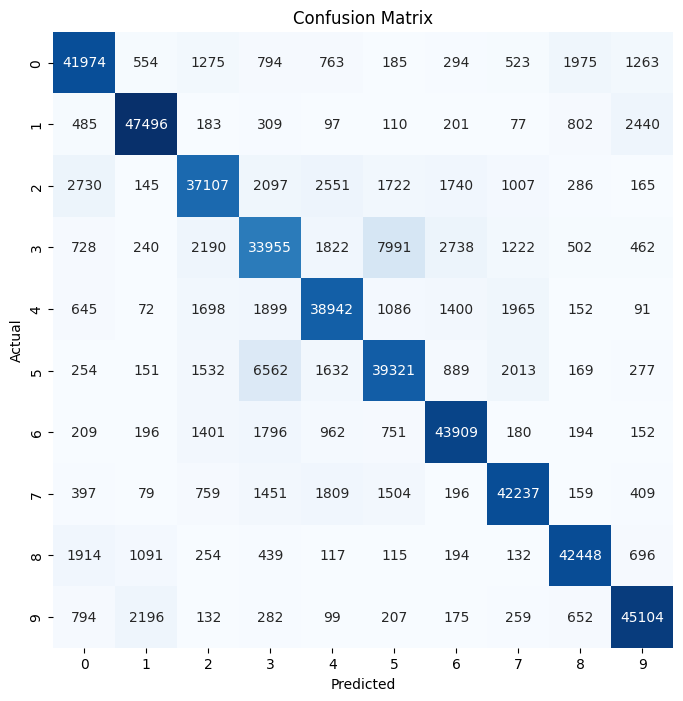

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     49600
           1       0.91      0.91      0.91     52200
           2       0.80      0.75      0.77     49550
           3       0.68      0.65      0.67     51850
           4       0.80      0.81      0.81     47950
           5       0.74      0.74      0.74     52800
           6       0.85      0.88      0.87     49750
           7       0.85      0.86      0.86     49000
           8       0.90      0.90      0.90     47400
           9       0.88      0.90      0.89     49900

    accuracy                           0.82    500000
   macro avg       0.82      0.83      0.83    500000
weighted avg       0.82      0.82      0.82    500000



In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(all_labels, all_predictions))

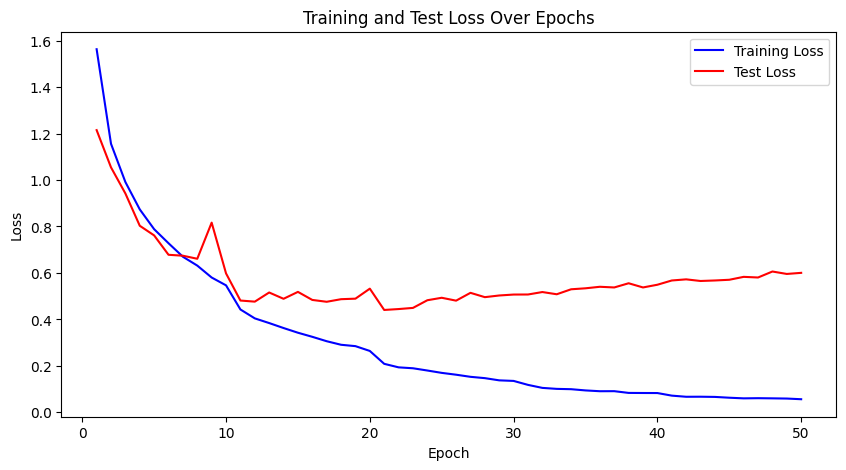

In [ ]:
plt.figure(figsize=(10, 5))

# Plot Training and Test Losses on the same graph
plt.plot(range(1, 50 + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, 50 + 1), test_losses, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()

plt.show()

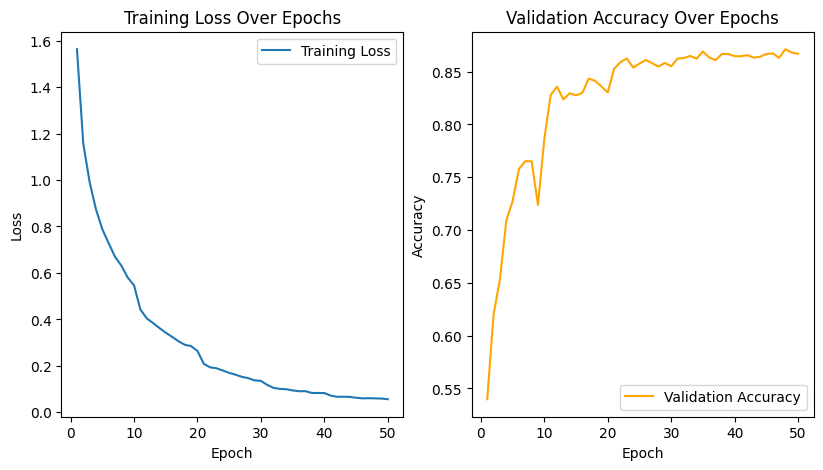

In [ ]:
plt.figure(figsize=(15, 5))

# Plot Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, 50 + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 50 + 1), valid_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

Same model just tried to increase the number of epochs to 100 to get better results

In [ ]:
train_losses, test_losses, valid_accuracies, all_predictions, all_labels = train_and_evaluate(improved_model, train_loader, valid_loader, test_loader, criterion, optimizer, lr_scheduler, epochs=100, train_on_gpu=True)


Epoch 1/100, Training Loss: 1.5603010989606572, Validation Accuracy: 0.548
Epoch 1/100, Training Loss: 1.5603010989606572, Test Loss: 1.2103338037865072
Epoch 2/100, Training Loss: 1.1485579373737493, Validation Accuracy: 0.6583
Epoch 2/100, Training Loss: 1.1485579373737493, Test Loss: 0.9667807847638673
Epoch 3/100, Training Loss: 0.9744204694089799, Validation Accuracy: 0.6865
Epoch 3/100, Training Loss: 0.9744204694089799, Test Loss: 0.926467573340935
Epoch 4/100, Training Loss: 0.8591226314584287, Validation Accuracy: 0.6986
Epoch 4/100, Training Loss: 0.8591226314584287, Test Loss: 0.8303021132191525
Epoch 5/100, Training Loss: 0.7723606719186131, Validation Accuracy: 0.7238
Epoch 5/100, Training Loss: 0.7723606719186131, Test Loss: 0.8079860632932638
Epoch 6/100, Training Loss: 0.7166420775480544, Validation Accuracy: 0.7671
Epoch 6/100, Training Loss: 0.7166420775480544, Test Loss: 0.6519852680496022
Epoch 7/100, Training Loss: 0.6604809706774764, Validation Accuracy: 0.7842
Ep

**Evaluation Graphs**

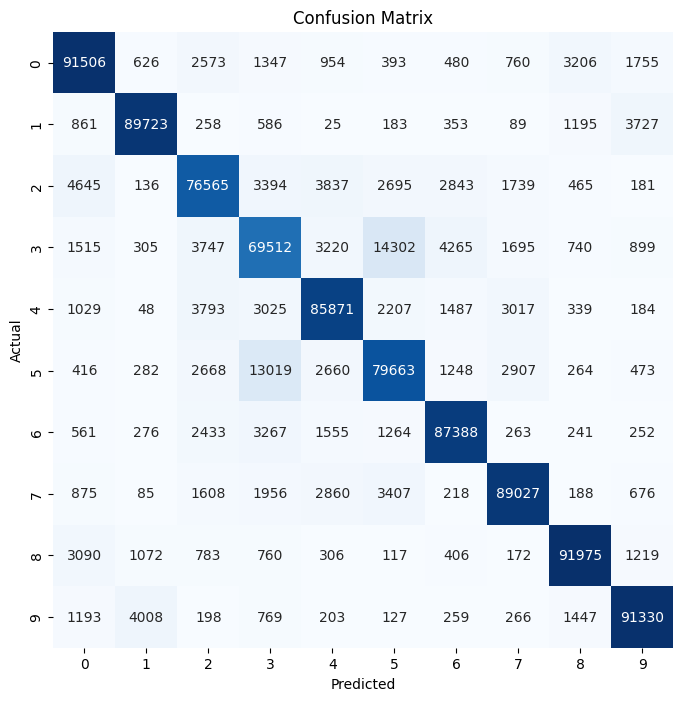

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87    103600
           1       0.93      0.92      0.93     97000
           2       0.81      0.79      0.80     96500
           3       0.71      0.69      0.70    100200
           4       0.85      0.85      0.85    101000
           5       0.76      0.77      0.77    103600
           6       0.88      0.90      0.89     97500
           7       0.89      0.88      0.89    100900
           8       0.92      0.92      0.92     99900
           9       0.91      0.92      0.91     99800

    accuracy                           0.85   1000000
   macro avg       0.85      0.85      0.85   1000000
weighted avg       0.85      0.85      0.85   1000000



In [ ]:
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(all_labels, all_predictions))

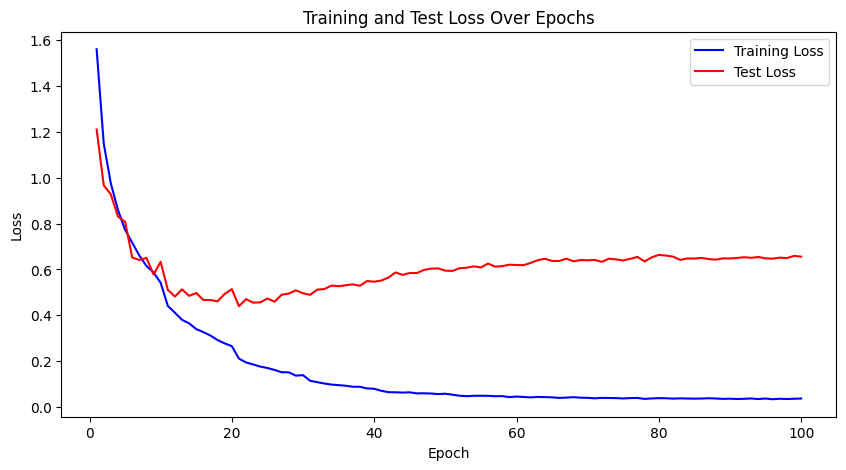

In [ ]:
plt.figure(figsize=(10, 5))

# Plot Training and Test Losses on the same graph
plt.plot(range(1, 100 + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, 100 + 1), test_losses, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()

plt.show()

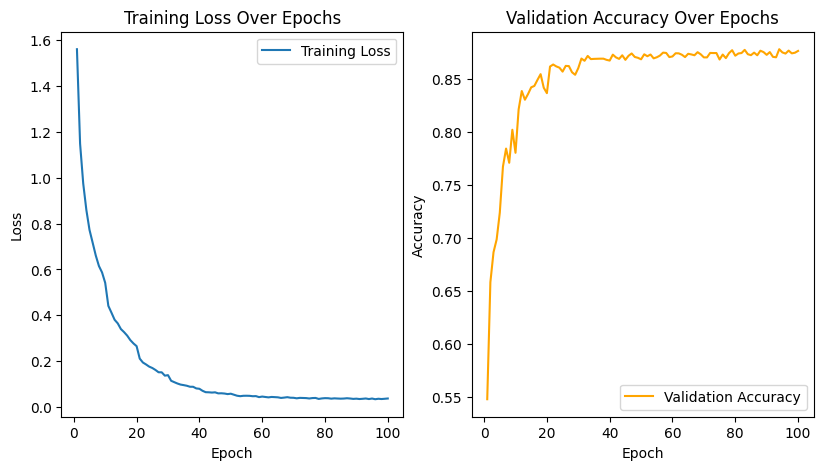

In [ ]:
plt.figure(figsize=(15, 5))

# Plot Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, 100 + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 100 + 1), valid_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

**Saving the model for the demo**

In [ ]:
torch.save(improved_model, 'model.pt')

**Results**

In [11]:
import pandas as pd
data = {
    'Model': ['First Model', 'Second Model','Third Model'],
    'Number of Conv Layers': [3, 4,4],
    'Batch Normalization': ['No', 'Yes','Yes'],
    'Weight Decay': ['No', 'Yes','Yes'],
    'Learning Rate Scheduler': ['No', 'Yes','Yes'],
    'Learning Rate':[0.001 , 0.001, 0.001],
    'optimizer':['Adam','Adam','Adam'],
    'Loss Function' :['CrossEntropyLoss','CrossEntropyLoss','CrossEntropyLoss'],
    'Accuracy':[0.79,0.86,0.87],
    'precision':[ 0.82,0.88 ,0.91],
    'recall':[0.83,0.90 ,0.92],
    'f1-score':[0.83,0.89 ,0.91],
    'Nuumber of Epochs':[20,50,100],

}

df = pd.DataFrame(data)
df.to_csv('model_comparisons.csv', index=False)

In [15]:
from IPython.display import display
display(df)

Model  Number of Conv Layers Batch Normalization Weight Decay  \
0   First Model                      3                  No           No   
1  Second Model                      4                 Yes          Yes   
2   Third Model                      4                 Yes          Yes   

  Learning Rate Scheduler  Learning Rate optimizer     Loss Function  \
0                      No          0.001      Adam  CrossEntropyLoss   
1                     Yes          0.001      Adam  CrossEntropyLoss   
2                     Yes          0.001      Adam  CrossEntropyLoss   

   Accuracy  precision  recall  f1-score  Nuumber of Epochs  
0      0.79       0.82    0.83      0.83                 20  
1      0.86       0.88    0.90      0.89                 50  
2      0.87       0.91    0.92      0.91                100

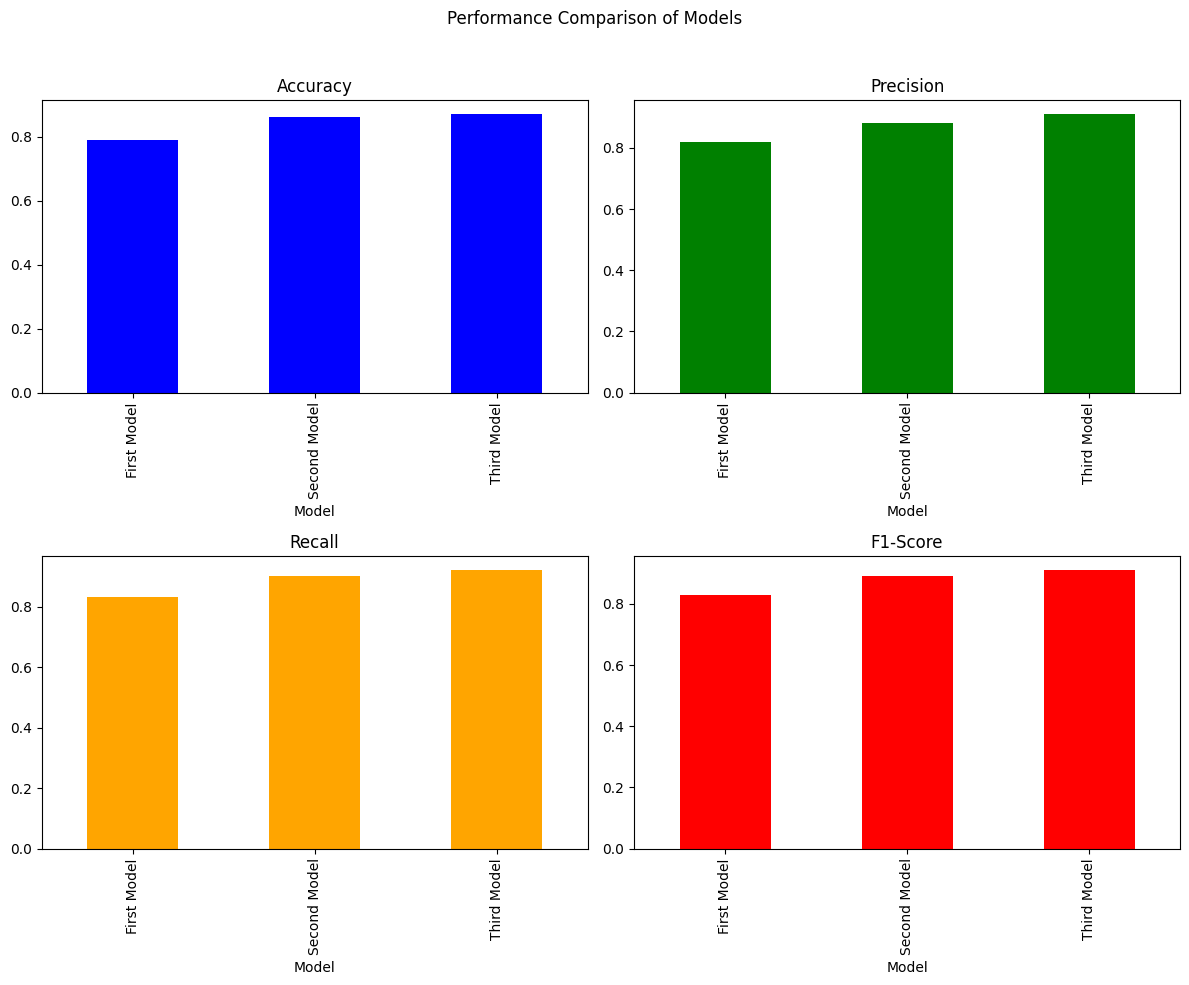

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Performance Comparison of Models')

# Plot Accuracy
df.plot(kind='bar', x='Model', y='Accuracy', ax=axes[0, 0], color='blue', legend=False)
axes[0, 0].set_title('Accuracy')

# Plot Precision
df.plot(kind='bar', x='Model', y='precision', ax=axes[0, 1], color='green', legend=False)
axes[0, 1].set_title('Precision')

# Plot Recall
df.plot(kind='bar', x='Model', y='recall', ax=axes[1, 0], color='orange', legend=False)
axes[1, 0].set_title('Recall')

# Plot F1-Score
df.plot(kind='bar', x='Model', y='f1-score', ax=axes[1, 1], color='red', legend=False)
axes[1, 1].set_title('F1-Score')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()